In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from datasets import load_dataset

data = load_dataset("marksverdhei/data-by-countries")

In [481]:
Z_THRESHOLD = 3
SEED = 42

# np.random.seed(SEED)

# Обработка пропусков

In [482]:
data

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'HDI', 'IHDI', 'Country', 'Year', 'democracy_eiu', 'democracy_eiu_normalized', 'regime_category', 'Happiness_Score', 'wpi', 'FH_WFI_TOTAL'],
        num_rows: 201
    })
})

In [483]:
data = data["train"].to_pandas()

In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                201 non-null    object 
 1   HDI                       193 non-null    float64
 2   IHDI                      193 non-null    float64
 3   Country                   194 non-null    object 
 4   Year                      201 non-null    int64  
 5   democracy_eiu             148 non-null    float64
 6   democracy_eiu_normalized  148 non-null    float64
 7   regime_category           148 non-null    object 
 8   Happiness_Score           137 non-null    float64
 9   wpi                       180 non-null    float64
 10  FH_WFI_TOTAL              197 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 17.4+ KB


In [485]:
data.head()

,Unnamed: 0,HDI,IHDI,Country,Year,democracy_eiu,democracy_eiu_normalized,regime_category,Happiness_Score,wpi,FH_WFI_TOTAL
0,CHE,0.967,0.891,Switzerland,2023,9.14,0.914,Full democracy,7.2401,84.01,96.0
1,NOR,0.966,0.903,Norway,2023,9.81,0.981,Full democracy,7.3155,91.89,100.0
2,ISL,0.959,0.910,Iceland,2023,9.45,0.945,Full democracy,7.5296,80.13,94.0
3,HKG,0.956,0.840,Hong Kong,2023,5.24,0.524,Hybrid regime,5.3085,43.06,42.0
4,DNK,0.952,0.898,Denmark,2023,9.28,0.928,Full democracy,7.5864,89.60,97.0


In [486]:
# парочку числовых срезал исходя из наблюдений через data wrangler (например year имеет лишь одно уникальное значение)
data = data.drop(["Unnamed: 0", "Country", "democracy_eiu_normalized", "regime_category", "Year"], axis=1)
data

,HDI,IHDI,democracy_eiu,Happiness_Score,wpi,FH_WFI_TOTAL
0,0.967,0.891,9.14,7.2401,84.01,96.0
1,0.966,0.903,9.81,7.3155,91.89,100.0
2,0.959,0.910,9.45,7.5296,80.13,94.0
3,0.956,0.840,5.24,5.3085,43.06,42.0
4,0.952,0.898,9.28,7.5864,89.60,97.0
...,...,...,...,...,...,...
196,NaN,NaN,NaN,NaN,60.19,NaN
197,NaN,NaN,NaN,NaN,56.72,NaN
198,NaN,NaN,NaN,NaN,20.66,3.0
199,NaN,NaN,NaN,NaN,NaN,84.0


In [487]:
# Последний столбец содержит в себе интовые данные на самом деле, потому его обработаю отдельно

data.head()

,HDI,IHDI,democracy_eiu,Happiness_Score,wpi,FH_WFI_TOTAL
0,0.967,0.891,9.14,7.2401,84.01,96.0
1,0.966,0.903,9.81,7.3155,91.89,100.0
2,0.959,0.910,9.45,7.5296,80.13,94.0
3,0.956,0.840,5.24,5.3085,43.06,42.0
4,0.952,0.898,9.28,7.5864,89.60,97.0


In [488]:
cols = data.drop(["FH_WFI_TOTAL"], axis=1).columns
cols

Index(['HDI', 'IHDI', 'democracy_eiu', 'Happiness_Score', 'wpi'], dtype='object')

In [489]:
for col in cols:
    mean = data[col].mean()

    data[col].fillna(mean, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HDI              201 non-null    float64
 1   IHDI             201 non-null    float64
 2   democracy_eiu    201 non-null    float64
 3   Happiness_Score  201 non-null    float64
 4   wpi              201 non-null    float64
 5   FH_WFI_TOTAL     197 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1800\2647599793.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean, inplace=True)


In [490]:
med = data["FH_WFI_TOTAL"].median()
med

61.0

In [491]:
data["FH_WFI_TOTAL"].fillna(med, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1800\3005624118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["FH_WFI_TOTAL"].fillna(med, inplace=True)


In [492]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HDI              201 non-null    float64
 1   IHDI             201 non-null    float64
 2   democracy_eiu    201 non-null    float64
 3   Happiness_Score  201 non-null    float64
 4   wpi              201 non-null    float64
 5   FH_WFI_TOTAL     201 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


# Обработка выбросов

In [493]:
data.describe()

,HDI,IHDI,democracy_eiu,Happiness_Score,wpi,FH_WFI_TOTAL
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.723741,0.610399,5.686757,5.539755,55.869389,57.288557
std,0.152042,0.192267,1.845408,0.939992,17.233631,30.916117
min,0.380000,0.222000,2.120000,1.859000,16.640000,1.000000
25%,0.610000,0.459000,4.600000,5.253600,44.950000,29.000000
50%,0.732000,0.625000,5.686757,5.539755,55.869389,61.000000
75%,0.838000,0.772000,6.680000,6.041200,67.700000,86.000000
max,0.967000,0.942000,9.810000,7.804200,91.890000,100.000000


## Метод межквартильного размаха


 === HDI ===
Q1 = 0.61
Q3 = 0.838
LB = 0.268
UB = 1.18


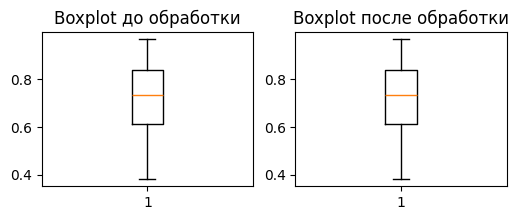


 === IHDI ===
Q1 = 0.459
Q3 = 0.772
LB = -0.01050000000000001
UB = 1.2415


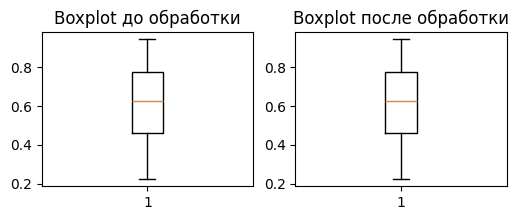


 === democracy_eiu ===
Q1 = 4.6
Q3 = 6.68
LB = 1.4799999999999995
UB = 9.8


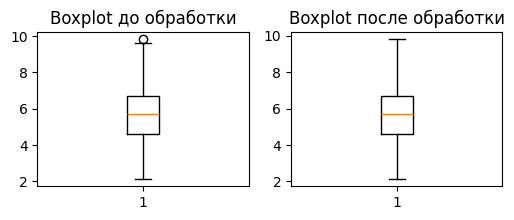


 === Happiness_Score ===
Q1 = 5.253600120544434
Q3 = 6.041200160980225
LB = 4.072200059890747
UB = 7.222600221633911


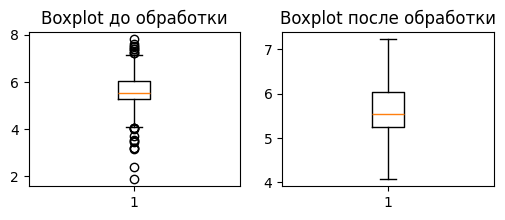


 === wpi ===
Q1 = 44.95
Q3 = 67.7
LB = 10.825000000000003
UB = 101.825


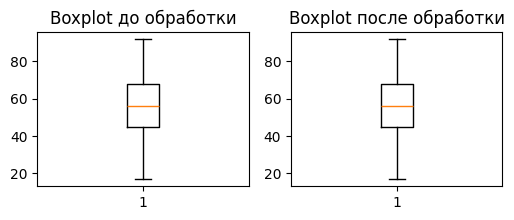


 === FH_WFI_TOTAL ===
Q1 = 29.0
Q3 = 86.0
LB = -56.5
UB = 171.5


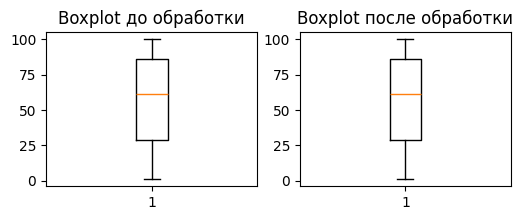

In [494]:
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\n === {col} ===")
    print(f"Q1 = {Q1}")
    print(f"Q3 = {Q3}")
    print(f"LB = {lower_bound}")
    print(f"UB = {upper_bound}")

    data_prepared = data[col].copy()
    data_prepared = data_prepared.apply(lambda x: upper_bound 
                                        if x > upper_bound else lower_bound 
                                        if x < lower_bound else x)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.boxplot(data[col])
    ax1.set_title('Boxplot до обработки')

    ax2.boxplot(data_prepared)
    ax2.set_title('Boxplot после обработки')

    plt.show()

## Z-score метод

In [495]:
for col in data.columns:
    data["Zscore"] = np.abs(stats.zscore(data[col]))

    outliers = data[col][data["Zscore"] > Z_THRESHOLD]

    print(len(outliers), outliers, sep="\n")
    print()

0
Series([], Name: HDI, dtype: float64)

0
Series([], Name: IHDI, dtype: float64)

0
Series([], Name: democracy_eiu, dtype: float64)

2
108    2.3922
181    1.8590
Name: Happiness_Score, dtype: float64

0
Series([], Name: wpi, dtype: float64)

0
Series([], Name: FH_WFI_TOTAL, dtype: float64)



In [496]:
data["Zscore"] = np.abs(stats.zscore(data["Happiness_Score"]))

newdf = data[["Happiness_Score", "Zscore"]]
newdf

,Happiness_Score,Zscore
0,7.240100,1.813408e+00
1,7.315500,1.893822e+00
2,7.529600,2.122159e+00
3,5.308500,2.466330e-01
4,7.586400,2.182736e+00
...,...,...
196,5.539755,9.472377e-16
197,5.539755,9.472377e-16
198,5.539755,9.472377e-16
199,5.539755,9.472377e-16


In [497]:
newdf[newdf["Zscore"] > Z_THRESHOLD]

,Happiness_Score,Zscore
108,2.3922,3.356852
181,1.8590,3.925507


In [498]:
newdf[((Z_THRESHOLD - 0.5) < newdf["Zscore"]) & (newdf["Zscore"] < Z_THRESHOLD)]

,Happiness_Score,Zscore
183,3.1376,2.561886


In [499]:
data.loc[data["Happiness_Score"] < 3] = 3.138

# Отбор признаков (жадник)

In [500]:
data.drop(["Zscore"], axis=1, inplace=True)
data

,HDI,IHDI,democracy_eiu,Happiness_Score,wpi,FH_WFI_TOTAL
0,0.967000,0.891000,9.140000,7.240100,84.010000,96.0
1,0.966000,0.903000,9.810000,7.315500,91.890000,100.0
2,0.959000,0.910000,9.450000,7.529600,80.130000,94.0
3,0.956000,0.840000,5.240000,5.308500,43.060000,42.0
4,0.952000,0.898000,9.280000,7.586400,89.600000,97.0
...,...,...,...,...,...,...
196,0.723741,0.610399,5.686757,5.539755,60.190000,61.0
197,0.723741,0.610399,5.686757,5.539755,56.720000,61.0
198,0.723741,0.610399,5.686757,5.539755,20.660000,3.0
199,0.723741,0.610399,5.686757,5.539755,55.869389,84.0


In [501]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y = data["Happiness_Score"]
x = data.drop(["Happiness_Score"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse**.5

(0.32617034361856434, 0.7003533464393904)

In [502]:
while len(x.columns) > 0:
    model_qualities = []

    for col in x.columns:
        x_new = x.drop([col], axis=1).copy()

        print(x_new.columns)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
        model = LinearRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        r2 = r2_score(y_test, y_pred)

        model_qualities.append(r2)

    worst_qual = min(model_qualities)
    useless_col = model_qualities.index(worst_qual)
    useless_col = x.columns[useless_col]

    print(model_qualities, useless_col)
    print()
    x.drop([useless_col], axis=1, inplace=True)


Index(['IHDI', 'democracy_eiu', 'wpi', 'FH_WFI_TOTAL'], dtype='object')
Index(['HDI', 'democracy_eiu', 'wpi', 'FH_WFI_TOTAL'], dtype='object')
Index(['HDI', 'IHDI', 'wpi', 'FH_WFI_TOTAL'], dtype='object')
Index(['HDI', 'IHDI', 'democracy_eiu', 'FH_WFI_TOTAL'], dtype='object')
Index(['HDI', 'IHDI', 'democracy_eiu', 'wpi'], dtype='object')
[0.35642791804912755, 0.2924710477723026, -0.9884604318007777, -0.8355277334122433, -1.9600659439511356] FH_WFI_TOTAL

Index(['IHDI', 'democracy_eiu', 'wpi'], dtype='object')
Index(['HDI', 'democracy_eiu', 'wpi'], dtype='object')
Index(['HDI', 'IHDI', 'wpi'], dtype='object')
Index(['HDI', 'IHDI', 'democracy_eiu'], dtype='object')
[-0.4750209767640934, -1.036626015400099, 0.3576011846685806, -0.6093517814052378] IHDI

Index(['democracy_eiu', 'wpi'], dtype='object')
Index(['HDI', 'wpi'], dtype='object')
Index(['HDI', 'democracy_eiu'], dtype='object')
[-1.041824550935397, -3.89464180487232, -0.42319970755271563] democracy_eiu

Index(['wpi'], dtype='object

хд на второй итерации получилось добиться качества получше


0.35642791804912755 - лучшее со срезом одной фичи

0.3576011846685806 - лучшее со срезом двух фич

хотя энивэй линейная регрессия мрёт на выбранном датасете